# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [1]:
import os
import pandas as pd
import numpy as np
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [58]:
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [3]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [4]:
query_main=query="""
    select * 
    from agg.tidy_data_30min
    where site = 20
"""
df_main = pd.read_sql_query(query_main, conn)

#agg.tidy_data_v2


C:\Users\Zóra\AppData\Local\Temp\ipykernel_23348\2220184392.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_main = pd.read_sql_query(query_main, conn)


In [5]:
pd.set_option('display.max_columns', None)

df_main

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
0,2019-04-23 15:00:00+00:00,20,2019,4,23,16,0,1,2,9.38,NaN,NaN,NaN,NaN,NaN,NaN,-27.63,-75.8800,12.71,2.03,0
1,2019-04-23 15:30:00+00:00,20,2019,4,23,16,30,1,2,10.35,NaN,NaN,NaN,NaN,NaN,NaN,-24.74,-34.7600,16.66,5.71,0
2,2019-04-23 16:00:00+00:00,20,2019,4,23,17,0,1,2,16.79,NaN,NaN,NaN,NaN,NaN,NaN,5.20,-11.6750,17.73,9.42,0
3,2019-04-23 16:30:00+00:00,20,2019,4,23,17,30,1,2,16.98,NaN,NaN,NaN,NaN,NaN,NaN,28.17,5.0250,28.62,15.78,0
4,2019-04-23 17:00:00+00:00,20,2019,4,23,18,0,1,2,11.89,NaN,NaN,NaN,NaN,NaN,NaN,53.22,11.9125,28.25,16.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,2020-03-30 04:30:00+00:00,20,2020,3,30,5,30,0,2,511.06,NaN,NaN,NaN,NaN,NaN,NaN,608.02,16.3600,570.76,147.54,0
17558,2020-03-30 05:00:00+00:00,20,2020,3,30,6,0,0,2,320.69,NaN,NaN,NaN,NaN,NaN,NaN,586.85,42.6575,635.50,216.76,0
17559,2020-03-30 05:30:00+00:00,20,2020,3,30,6,30,0,2,245.21,NaN,NaN,NaN,NaN,NaN,NaN,524.16,50.5500,616.78,256.78,0
17560,2020-03-30 06:00:00+00:00,20,2020,3,30,7,0,0,2,187.68,NaN,NaN,NaN,NaN,NaN,NaN,458.60,28.3925,428.11,144.64,0


In [6]:
df_main = df_main[['timestamp','net_load']]
df_main

,timestamp,net_load
0,2019-04-23 15:00:00+00:00,9.38
1,2019-04-23 15:30:00+00:00,10.35
2,2019-04-23 16:00:00+00:00,16.79
3,2019-04-23 16:30:00+00:00,16.98
4,2019-04-23 17:00:00+00:00,11.89
...,...,...
17557,2020-03-30 04:30:00+00:00,511.06
17558,2020-03-30 05:00:00+00:00,320.69
17559,2020-03-30 05:30:00+00:00,245.21
17560,2020-03-30 06:00:00+00:00,187.68


### Convert Convert 'ts' to datetime and set as index

### Normalise net_load

In [7]:
df_main.rename(columns={'timestamp':'ts'},inplace=True)
df_main['ts'] = pd.to_datetime(df_main['ts'])
df_main.set_index('ts', inplace=True)
df_main.sort_index(inplace=True)
df_main.head()

#df_main['datetime'] = pd.to_datetime(df_main['timestamp'])
#df_main.set_index('datetime', inplace=True)

C:\Users\Zóra\AppData\Local\Temp\ipykernel_23348\3960147717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.rename(columns={'timestamp':'ts'},inplace=True)
C:\Users\Zóra\AppData\Local\Temp\ipykernel_23348\3960147717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['ts'] = pd.to_datetime(df_main['ts'])
C:\Users\Zóra\AppData\Local\Temp\ipykernel_23348\3960147717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,net_load
ts,
2019-04-01 00:00:00+00:00,198.79
2019-04-01 00:30:00+00:00,250.51
2019-04-01 01:00:00+00:00,194.07
2019-04-01 01:30:00+00:00,245.33
2019-04-01 02:00:00+00:00,223.68


C:\Users\Zóra\AppData\Local\Temp\ipykernel_23348\600009085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['net_load_norm'] = df_main['net_load'] / max(abs(df_main['net_load']))
C:\Users\Zóra\AppData\Local\Temp\ipykernel_23348\600009085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.drop('net_load',axis=1,inplace=True)


<Axes: xlabel='ts'>

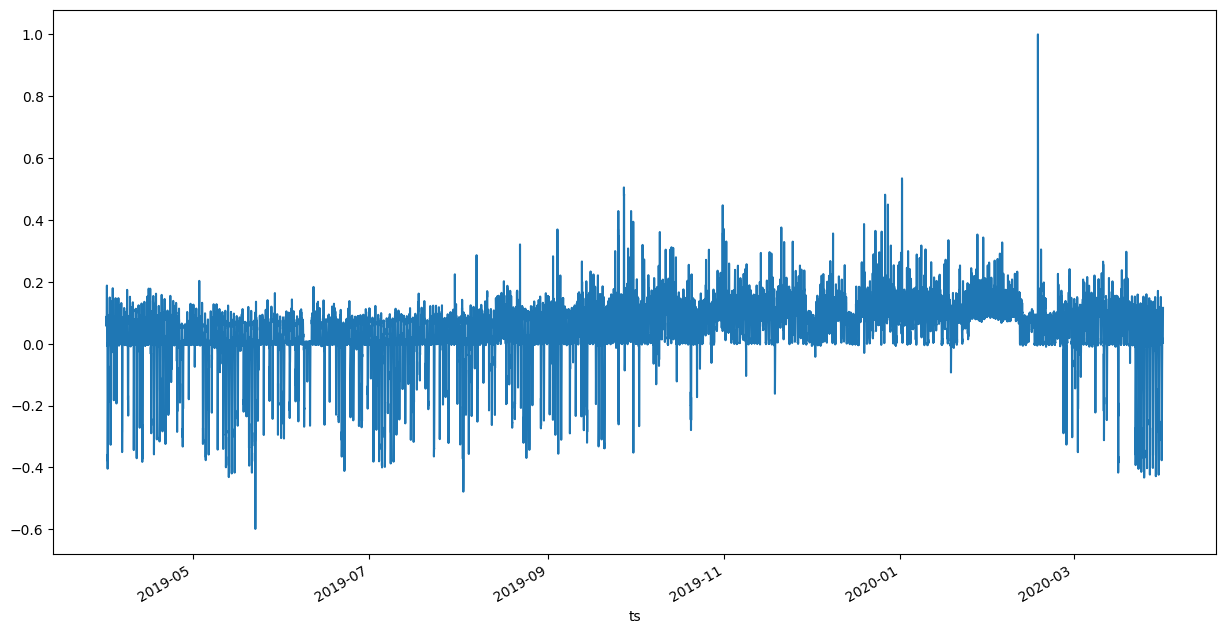

In [8]:
df_main['net_load_norm'] = df_main['net_load'] / max(abs(df_main['net_load']))
df_main.drop('net_load',axis=1,inplace=True)

plt.figure(figsize=(15,8))
df_main['net_load_norm'].plot()

In [9]:
df_main.head()

,net_load_norm
ts,
2019-04-01 00:00:00+00:00,0.066453
2019-04-01 00:30:00+00:00,0.083742
2019-04-01 01:00:00+00:00,0.064875
2019-04-01 01:30:00+00:00,0.082010
2019-04-01 02:00:00+00:00,0.074773


### Creating function for lagged net_load

In [10]:
#Creating function for lagged net_load

def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for lag in lags:
        df_lagged[f'net_load_lag_{lag}'] = df_lagged['net_load_norm'].shift(lag)
    # Remove rows with NaN values due to shifting
    df_lagged = df_lagged.dropna()
    return df_lagged

# Define your lags
lags = [1,2,3,4,5,48,96]


# Prepare your dataset with lagged features
df_lagged = create_lagged_features(df_main, lags)

df_lagged

,net_load_norm,net_load_lag_1,net_load_lag_2,net_load_lag_3,net_load_lag_4,net_load_lag_5,net_load_lag_48,net_load_lag_96
ts,,,,,,,,
2019-04-03 00:00:00+00:00,0.090284,0.058186,0.013331,0.004677,0.004540,0.003594,0.057507,0.066453
2019-04-03 00:30:00+00:00,0.062582,0.090284,0.058186,0.013331,0.004677,0.004540,0.093222,0.083742
2019-04-03 01:00:00+00:00,0.067512,0.062582,0.090284,0.058186,0.013331,0.004677,0.089776,0.064875
2019-04-03 01:30:00+00:00,0.065470,0.067512,0.062582,0.090284,0.058186,0.013331,0.069652,0.082010
2019-04-03 02:00:00+00:00,0.075509,0.065470,0.067512,0.062582,0.090284,0.058186,0.076010,0.074773
...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,0.009393,0.003149,0.005629,0.005181,0.003640,0.005125,0.097287,0.004503
2020-03-31 21:00:00+00:00,0.003711,0.009393,0.003149,0.005629,0.005181,0.003640,0.104725,0.004122
2020-03-31 21:30:00+00:00,0.065681,0.003711,0.009393,0.003149,0.005629,0.005181,0.106574,0.091033


#### Create initial_ts by taking the last 96 observations (48 hours) from this point backward to cover all lags

(Previously took the last 192 observations of 15 minute-intervalls (48 hours) from this point backward to cover all lags)

In [12]:
# Identify the time point for initial_ts
#Identify the start and end points for creating an initial time series to use in rolling predictions. 
#Select a subset of df_lagge to be the set of data that the rolling prediction function will use to start making predictions

end_time = df_lagged.index[-1]
start_time = end_time - pd.Timedelta(hours=24)  # 192 intervals of 15 minutes is equivalent to 48 hours

# Make sure you don't go out of bounds
if start_time < df_lagged.index[0]:
    raise ValueError("Not enough data points for the required lags.")

# Create initial_ts for rolling predictions
# We select the data between 'start_time' and 'end_time', including all necessary lags.
initial_ts = df_lagged.loc[start_time:end_time]['net_load_norm']

In [13]:
initial_ts

ts
2020-03-30 22:30:00+00:00    0.090709
2020-03-30 23:00:00+00:00    0.079560
2020-03-30 23:30:00+00:00    0.077544
2020-03-31 00:00:00+00:00    0.106838
2020-03-31 00:30:00+00:00    0.081542
2020-03-31 01:00:00+00:00    0.083513
2020-03-31 01:30:00+00:00    0.074653
2020-03-31 02:00:00+00:00    0.092881
2020-03-31 02:30:00+00:00    0.097759
2020-03-31 03:00:00+00:00    0.079811
2020-03-31 03:30:00+00:00    0.082298
2020-03-31 04:00:00+00:00    0.086874
2020-03-31 04:30:00+00:00    0.151174
2020-03-31 05:00:00+00:00    0.118073
2020-03-31 05:30:00+00:00    0.117120
2020-03-31 06:00:00+00:00    0.051948
2020-03-31 06:30:00+00:00    0.018142
2020-03-31 07:00:00+00:00   -0.002196
2020-03-31 07:30:00+00:00    0.001839
2020-03-31 08:00:00+00:00    0.005265
2020-03-31 08:30:00+00:00   -0.001157
2020-03-31 09:00:00+00:00   -0.027896
2020-03-31 09:30:00+00:00   -0.020916
2020-03-31 10:00:00+00:00   -0.035127
2020-03-31 10:30:00+00:00   -0.152839
2020-03-31 11:00:00+00:00   -0.351890
2020-03-3

### Define features and target, train and test

In [14]:
# Define features and target
X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-72]
test_features = X.iloc[-72:]

train_target = y.iloc[:-72]
test_target = y.iloc[-72:]

### Model definition and training 

In [15]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)


### Create get_input function 

In [16]:
def get_input(ts, lags):
    # Convert lags to positions from the end of the series
    positions = [ - 1 - lag for lag in lags]
    # Use iloc to get values at positions
    return ts.iloc[positions].values.reshape(1, -1)

In [17]:
print(train_target.tail())
print(train_target.iloc[-2])
print(get_input(train_target, lags))

ts
2020-03-30 08:30:00+00:00   -0.013492
2020-03-30 09:00:00+00:00   -0.007862
2020-03-30 09:30:00+00:00   -0.056658
2020-03-30 10:00:00+00:00   -0.405268
2020-03-30 10:30:00+00:00   -0.423423
Name: net_load_norm, dtype: float64
-0.405268348125491
[[-0.40526835 -0.05665814 -0.00786241 -0.01349178 -0.00755486 -0.13813034
   0.00601046]]


In [18]:
#input_features = get_input(train_target, lags)
#pred = rf.predict(input_features)
#print(input_features)
#print(pred)

In [19]:
initial_ts

ts
2020-03-30 22:30:00+00:00    0.090709
2020-03-30 23:00:00+00:00    0.079560
2020-03-30 23:30:00+00:00    0.077544
2020-03-31 00:00:00+00:00    0.106838
2020-03-31 00:30:00+00:00    0.081542
2020-03-31 01:00:00+00:00    0.083513
2020-03-31 01:30:00+00:00    0.074653
2020-03-31 02:00:00+00:00    0.092881
2020-03-31 02:30:00+00:00    0.097759
2020-03-31 03:00:00+00:00    0.079811
2020-03-31 03:30:00+00:00    0.082298
2020-03-31 04:00:00+00:00    0.086874
2020-03-31 04:30:00+00:00    0.151174
2020-03-31 05:00:00+00:00    0.118073
2020-03-31 05:30:00+00:00    0.117120
2020-03-31 06:00:00+00:00    0.051948
2020-03-31 06:30:00+00:00    0.018142
2020-03-31 07:00:00+00:00   -0.002196
2020-03-31 07:30:00+00:00    0.001839
2020-03-31 08:00:00+00:00    0.005265
2020-03-31 08:30:00+00:00   -0.001157
2020-03-31 09:00:00+00:00   -0.027896
2020-03-31 09:30:00+00:00   -0.020916
2020-03-31 10:00:00+00:00   -0.035127
2020-03-31 10:30:00+00:00   -0.152839
2020-03-31 11:00:00+00:00   -0.351890
2020-03-3

### Rolling origin prediction

Create a function that performs sequential predictions over a specified number of steps, using each prediction as input for the next

In [59]:
def rolling_window_predictions(model, full_series, n, lags):
    
    initial_ts = full_series.copy()#[-max(lags):] # Initial time series for rolling predictions    
    predictions = []  # Store out-of-sample predictions
    
    for i in range(0,n): # Iterate over the test set to predict one step ahead each time
        
        input_features = get_input(initial_ts, lags).reshape(1, -1) # Get the input features for the current prediction
        
        pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
        predictions.append(pred)
        
        # Append the actual observed value to roll the window forward
        initial_ts = pd.concat([initial_ts, pd.Series([pred])], ignore_index=True)
    
    return predictions

In [60]:
predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

In [61]:
len(predicted_values)

36

In [62]:
predicted_values

[0.0863235817556035,
 0.10225475463236892,
 0.086505543560815,
 0.08999994562526538,
 0.08430699650597534,
 0.08748272102157818,
 0.08556604893466378,
 0.08979145786872587,
 0.084216784311588,
 0.08638624211168495,
 0.07722033990205417,
 0.08510059802697684,
 0.08086055736004277,
 0.0807205177661,
 0.08077631434421428,
 0.07629175441302376,
 0.07545322268465124,
 0.07463577863577864,
 0.07939262282132074,
 0.07690674376974375,
 0.07755920327600326,
 0.07705272648000135,
 0.06884945427802575,
 0.07474603339517624,
 0.07221026592455164,
 0.07280175165889449,
 0.07514409400123682,
 0.08232913804342376,
 0.06909328252185394,
 0.06094690584833442,
 0.06526898326898327,
 0.0664187935616507,
 0.0651191922365408,
 0.07301068043925182,
 0.0660956572257601,
 0.07160360360360361]

## Trying to implement the rolling window predictions with the new function

## Re-define train + test to include 30 days for test

In [23]:
# Define features and target
X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-2160]
test_features = X.iloc[-2160:]

train_target = y.iloc[:-2160]
test_target = y.iloc[-2160:]


In [24]:
test_target

ts
2020-02-15 21:00:00+00:00    0.082639
2020-02-15 21:30:00+00:00    0.090428
2020-02-15 22:00:00+00:00    0.081763
2020-02-15 22:30:00+00:00    0.094222
2020-02-15 23:00:00+00:00    0.087162
                               ...   
2020-03-31 20:30:00+00:00    0.009393
2020-03-31 21:00:00+00:00    0.003711
2020-03-31 21:30:00+00:00    0.065681
2020-03-31 22:00:00+00:00    0.097993
2020-03-31 22:30:00+00:00    0.115897
Name: net_load_norm, Length: 2160, dtype: float64

In [25]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

In [26]:
def nested_prediction_model(model, input_ts, true_data, n_steps, n_days, lags=[1,2,3,4,5,48,96] ):
    full_predictions = []
    ts = input_ts.copy()
# Iterate over each day in the test data
    for day in range(0, n_days):
        #current_test_series = ts[day*72 : (day+1)*72] # Current test series to be the next 36 hours (72 intervals of 30 minutes)
        # Make predictions for the current day
        pred_day = rolling_window_predictions(model, ts, n_steps, lags)

        # Append the day's predictions to the full predictions
        full_predictions.extend(pred_day)

        # update true values
        true_values = true_data[day*n_steps : (day+1)*n_steps]

        ts = pd.concat([ts, pd.Series(true_values)]) # Update ts by appending the predicted values

    return full_predictions



In [27]:
full_predictions=nested_prediction_model(rf, train_target, test_target, 72, 30, lags=[1,2,3,4,5,48,96])
full_predictions

C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Zóra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:

[0.0863235817556035,
 0.10225475463236892,
 0.086505543560815,
 0.08999994562526538,
 0.08430699650597534,
 0.08748272102157818,
 0.08556604893466378,
 0.08979145786872587,
 0.084216784311588,
 0.08638624211168495,
 0.07722033990205417,
 0.08510059802697684,
 0.08086055736004277,
 0.0807205177661,
 0.08077631434421428,
 0.07629175441302376,
 0.07545322268465124,
 0.07463577863577864,
 0.07939262282132074,
 0.07690674376974375,
 0.07755920327600326,
 0.07705272648000135,
 0.06884945427802575,
 0.07474603339517624,
 0.07221026592455164,
 0.07280175165889449,
 0.07514409400123682,
 0.08232913804342376,
 0.06909328252185394,
 0.06094690584833442,
 0.06526898326898327,
 0.0664187935616507,
 0.0651191922365408,
 0.07301068043925182,
 0.0660956572257601,
 0.07160360360360361,
 0.07341826585769438,
 0.06640737896605324,
 0.07106146612779754,
 0.06968409968409969,
 0.06981952150829862,
 0.06947634854267998,
 0.0721059583943238,
 0.07699958729569273,
 0.07847953848992965,
 0.08749498009851411,
 

In [28]:
len(full_predictions)

2160

Convert full_predictions into a Pandas Series with the same index as the test_target

In [29]:
full_predictions_series = pd.Series(full_predictions, index=test_target.index[:len(full_predictions)])



In [30]:
len(test_target)

2160

In [31]:
len(train_target)

15306

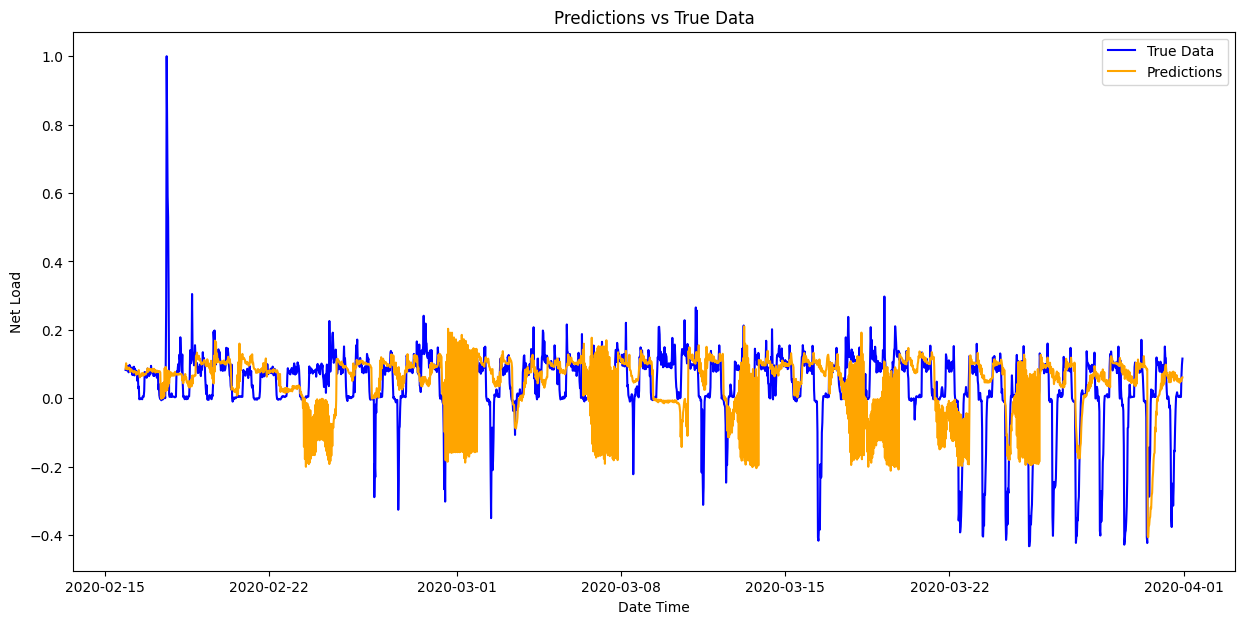

In [32]:
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='True Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()

In [33]:
train_target

ts
2019-04-03 00:00:00+00:00    0.090284
2019-04-03 00:30:00+00:00    0.062582
2019-04-03 01:00:00+00:00    0.067512
2019-04-03 01:30:00+00:00    0.065470
2019-04-03 02:00:00+00:00    0.075509
                               ...   
2020-02-15 18:30:00+00:00    0.089712
2020-02-15 19:00:00+00:00    0.106333
2020-02-15 19:30:00+00:00    0.084150
2020-02-15 20:00:00+00:00    0.093052
2020-02-15 20:30:00+00:00    0.085046
Name: net_load_norm, Length: 15306, dtype: float64

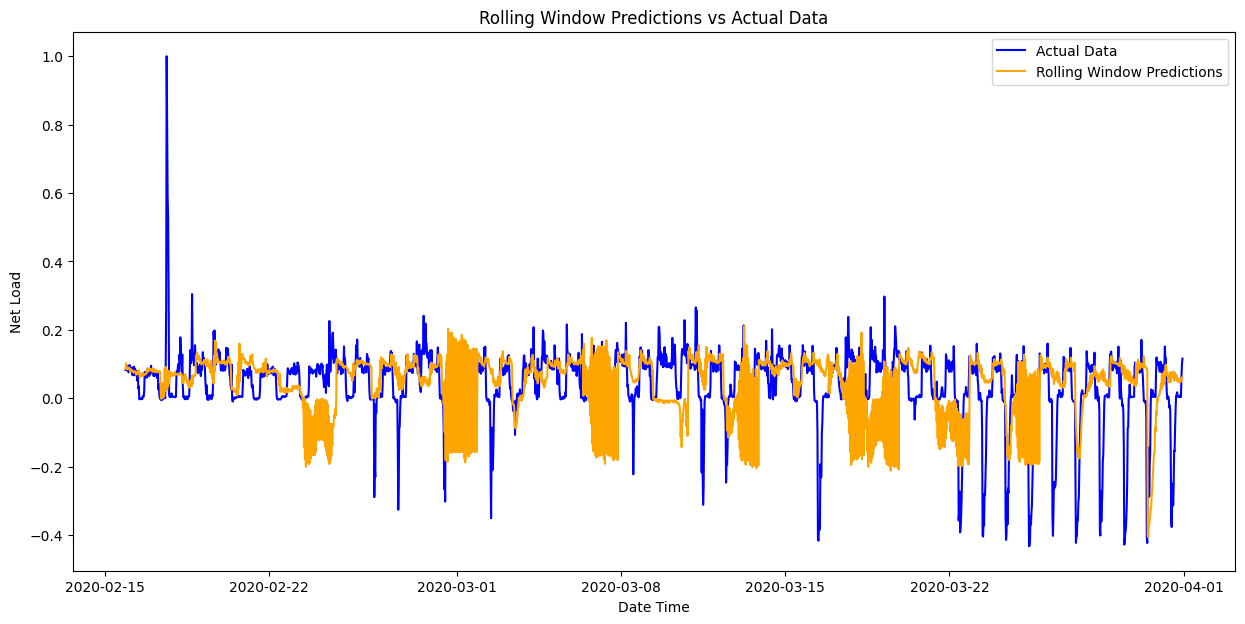

In [34]:
# Plot the full predictions against the actual data
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='Actual Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Rolling Window Predictions', color='orange')
plt.legend()
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.title('Rolling Window Predictions vs Actual Data')
plt.show()